### 교차검증을 간단하게 할 수 있는 방법
- 프로세스(폴드설정->루프반복을 통한 학습 및 테스트의  인덱스 추출->학습과예측)
- cross_val_score(예측모델, 피쳐세트, 레이블, 성능평가 지표, 폴드 갯수)

In [18]:
from sklearn.tree            import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets        import load_iris

import numpy as np
import numpy as pd

import matplotlib.pyplot as plt
import seaborn           as sns

In [2]:
iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
data = iris_data.data
label = iris_data.target

In [10]:
# random_state을 안주면 할때마다 데이터가 달라짐
dt_clf = DecisionTreeClassifier(random_state=100)

In [17]:
# 성능평가지표 : accuracy, 교차검증 : 5개
scores = cross_validate(dt_clf, data, label, cv=5, scoring='accuracy')
scores

{'fit_time': array([0.00100064, 0.0010004 , 0.00099945, 0.        , 0.00100064]),
 'score_time': array([0.        , 0.00100112, 0.        , 0.        , 0.        ]),
 'test_score': array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])}

In [12]:
# 성능평가지표 : accuracy, 교차검증 : 5개
scores = cross_val_score(dt_clf, data, label, cv=5, scoring='accuracy')
scores

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

In [15]:
print('평균 검증 정확도 : ', np.round(np.mean(scores), 2))

평균 검증 정확도 :  0.95


### 엔트로피의 이해

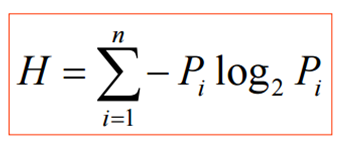

In [22]:
from IPython.display import Image
Image('C:/Users/ruby/Jupyter/numpy_img/entropy.png')

In [ ]:
# 만약 3개는 yes, 2개는 no
H = -(2/5)log(2/5)-(3/5)log(3/5)=0.971

In [25]:
# entropy가 크면 분포가 고르다는 뜻
def entropy(x) :
    return (-x*np.log(x)).sum()

In [26]:
# sample data
grp01 = np.array([0.3, 0.4, 0.3])
grp02 = np.array([0.7, 0.2, 0.1])
grp03 = np.array([0.01, 0.01, 0.98])

In [27]:
e01 = entropy(grp01)
e02 = entropy(grp02)
e03 = entropy(grp03)

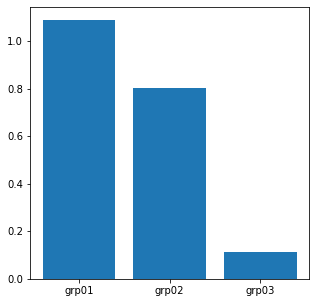

In [28]:
plt.figure(figsize=(5,5))
plt.bar(['grp01', 'grp02', 'grp03'], [e01, e02, e03])
plt.show()
plt.close()

### DecisionTree 시각화
- min_samples_split : 노드를 분리하기 위한 최소한의 샘플 수(과적합을 제어할 때 사용), defalut=2
- min_samples_leaf : 최하단의 노드(리프노드)가 되기위한 최소한의 샘플 수(과적합을 제어할 때 사용)
- max_features : 피쳐의 최대 수
- max_depth : 트리의 최대 깊이
- max_leaf_nodes : 리프노드의 최대갯수

In [33]:
import graphviz
from sklearn.tree            import DecisionTreeClassifier
from sklearn.datasets        import load_iris
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import export_graphviz

In [55]:
# max_depth를 제한둘 수 있음. 깊이가 너무 깊으면 과적합이 발생할 가능성이 높음
dt_clf = DecisionTreeClassifier(random_state=100, criterion='entropy', max_depth=3, min_samples_split=3)

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=100)

In [56]:
# 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=3,
                       random_state=100)

In [57]:
# DecisionTree 시각화 파일 저장

export_graphviz(dt_clf, 
                out_file='iris_tree.dot', 
                class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names,
                impurity=True, # 불순도
                filled=True)

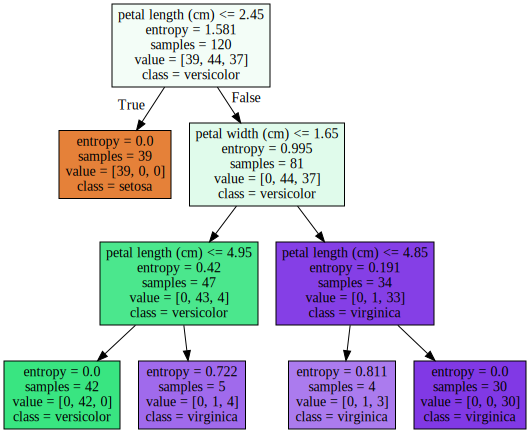

In [58]:
# read file
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files (x86)/Graphviz2.38/bin/'

with open('iris_tree.dot') as f :
    dot_graph = f.read()
graphviz.Source(dot_graph)

### GridSearchCV : 교차검증과 하이퍼 파라미터를 한번에 가능
- estimator : 분류기(알고리즘)
- param_grid : {param : value, param : value}
- scoring : 평가방법 지정
- refit=True : 최적의 하이퍼 파라미터를 찾는 재학습

In [45]:
import graphviz
from sklearn.tree            import DecisionTreeClassifier
from sklearn.datasets        import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics         import accuracy_score

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [46]:
#grid_parameter = {'max_depth' : [1,2,3],
#                  'min_samples_split' : [2,3]}

#pd.read_csv('Grid.csv', index_col='순번')

In [48]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=100)
dt_clf = DecisionTreeClassifier(random_state=100)

grid_parameter = {'max_depth' : [1,2,3],
                 'min_samples_split' : [2,3]}

In [50]:
# 튜닝
dt_searchCV = GridSearchCV(dt_clf, param_grid = grid_parameter, cv=3, refit=True)

In [51]:
# 학습
dt_searchCV.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]})

In [52]:
# 속성 확인
dt_searchCV.cv_results_

{'mean_fit_time': array([0.00147343, 0.00133085, 0.0010012 , 0.0010047 , 0.00066034,
        0.00099874]),
 'std_fit_time': array([6.53613334e-04, 4.73075613e-04, 1.14065012e-06, 7.10471364e-06,
        4.66966199e-04, 1.34490059e-05]),
 'mean_score_time': array([0.00065462, 0.00033371, 0.00066622, 0.00066678, 0.00033434,
        0.00033204]),
 'std_score_time': array([0.00046316, 0.00047193, 0.00047109, 0.00047158, 0.00047283,
        0.00046957]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'min_samples_split': 2},
  {'max_depth': 1, 'min_samples_split': 3},
  {'max_depth': 2, 'min_samples_split': 2},
  {'max_depth': 2, 'min_samples_split': 3},
  {'ma

In [53]:
# 속성들을 데이터프레임 형태로 변환
scoreDF= pd.DataFrame(dt_searchCV.cv_results_)
scoreDF

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001473,0.000654,0.000655,0.000463,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.70,0.700,0.675,0.691667,0.011785,5
1,0.001331,0.000473,0.000334,0.000472,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.70,0.700,0.675,0.691667,0.011785,5
2,0.001001,0.000001,0.000666,0.000471,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.95,0.900,1.000,0.950000,0.040825,3
3,0.001005,0.000007,0.000667,0.000472,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.95,0.900,1.000,0.950000,0.040825,3
4,0.000660,0.000467,0.000334,0.000473,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.95,0.975,1.000,0.975000,0.020412,1
5,0.000999,0.000013,0.000332,0.000470,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.95,0.975,1.000,0.975000,0.020412,1


In [54]:
# rank sore가 1일때 성능이 가장 좋음
# 그러므로 {'max_depth': 3, 'min_samples_split': 2} 또는 {'max_depth': 3, 'min_samples_split': 3}를 사용하도록 한다.
scoreDF[['params', 'rank_test_score']]

,params,rank_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",5
1,"{'max_depth': 1, 'min_samples_split': 3}",5
2,"{'max_depth': 2, 'min_samples_split': 2}",3
3,"{'max_depth': 2, 'min_samples_split': 3}",3
4,"{'max_depth': 3, 'min_samples_split': 2}",1
5,"{'max_depth': 3, 'min_samples_split': 3}",1


In [62]:
print('최적의 파라미터 : ',dt_searchCV.best_params_)
print('최적의 정확도   : ',dt_searchCV.best_score_)
print('최적의 Estimator: ',dt_searchCV.best_estimator_)

최적의 파라미터 :  {'max_depth': 3, 'min_samples_split': 2}
최적의 정확도   :  0.975
최적의 Estimator:  DecisionTreeClassifier(max_depth=3, random_state=100)


In [64]:
# 최적의 Estimator를 이용한 예측
model = dt_searchCV.best_estimator_
pred = model.predict(X_test)

print('모델 정확도 : ',accuracy_score(y_test, pred))

모델 정확도 :  0.9666666666666667
